In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
start = time.time()
#read data in chunks of 1 million rows at a time
chunk1 = pd.read_csv('I:\\NIDS3\\X.csv',chunksize=1000000)
chunk2 = pd.read_csv('I:\\NIDS3\\y.csv',chunksize=1000000)
X = pd.concat(chunk1)
y = pd.concat(chunk2)

In [65]:
y.shape

(15861044,)

In [3]:
X= X.drop(['Unnamed: 0'], axis=1)

In [4]:
y= y.drop(['Unnamed: 0'], axis=1)

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.977718,0.402103,-0.295856,-0.028069,0.676807,0.007785,0.751641,0.216640,0.091235,-0.102416,-0.053140,-0.124042,-0.388316,0.047374,-0.069656
1,-0.629030,-0.009899,0.886495,-0.055828,0.038352,-0.055626,0.509755,0.074962,0.386600,-0.067523,-0.073999,0.320990,-0.187315,0.082582,0.037743
2,0.641234,0.484651,-1.546575,0.146615,-0.088324,-0.112943,-0.505355,0.501987,-0.029615,0.275695,0.026792,0.054615,-0.057803,0.028471,0.098008
3,0.500662,0.254488,-1.396823,0.172128,-0.059099,0.244663,-0.524460,0.494607,0.160558,0.348528,-0.076139,-0.027627,-0.118762,-0.077157,0.125274
4,-0.629452,0.124084,0.263159,0.039408,0.220551,-0.171851,0.199295,-0.094787,0.023494,0.136607,-0.028245,0.095461,-0.235603,-0.017225,0.143169


In [5]:
y=y['0']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train = X_train.values
X_test = X_test.values

X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam
import keras
# Conv1D + LSTM
from keras.layers.convolutional import Conv1D 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

In [12]:
from tensorflow.keras.layers import BatchNormalization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [20]:
from tensorflow.keras.layers import BatchNormalization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

In [16]:
import os
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.metrics import accuracy_score, make_scorer, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor

from keras.models import Sequential
from keras.layers import Dense

In [17]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LSTM, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import backend as K

num_folds = 5
verbosity = 1
n_classes = 2
n_features = X_train_lstm.shape[2]
activation = 'relu'
batch_size = 1024
dropout_rate = 0.2
epochs = 500
kernel_initializer = 'normal'
lstm_units_1 = 50
lstm_units_2 = 30
lstm_units_3 = 50
optimizer = 'Adamax'


inputs = X_train_lstm
targets = Y_train

callback_early_stopping = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    K.clear_session()  # Clear previous model sessions
    
     # Modeli oluşturma
    model = Sequential()
    model.add(LSTM(units=lstm_units_1, activation=activation, kernel_initializer=kernel_initializer, return_sequences=True, input_shape=(timesteps, features)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units_2, activation=activation, kernel_initializer=kernel_initializer, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units_3, activation=activation, kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='softmax'))

    # Modeli derleme
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    history = model.fit(inputs[train], targets[train], validation_split=0.2, 
                        callbacks=[callback_early_stopping, callback_reduce_lr],
                        batch_size=batch_size,
                        epochs=no_epochs,
                        verbose=verbosity)

    scores = model.evaluate(inputs[test], targets[test], verbose=1)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    # Değerlendirme metriklerini hesapla
    true_labels = targets[test]

    predictions = model.predict(inputs[test])
    predicted_labels = np.argmax(predictions, axis=1)  # Varsayılan olarak sınıfların en yüksek olasılığına göre tahminler

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')

    print(f'Accuracy: {accuracy:.5f}, Precision: {precision:.5f}, Recall: {recall:.5f}')
    fold_no += 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 50)          13200     
_________________________________________________________________
dropout (Dropout)            (None, None, 50)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 50)          20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                9720      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
softmax (Dense)              (None, 2)                 6

In [18]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 5), round(precision,5), \
                                     round(recall, 5), round(f1_score,5)]
    return df_performance

In [19]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y_resample, labels, title): 
    y_cat = to_categorical(y_resample)
    
    # Compute ROC curvmn e and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
#     print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [20]:
# predicting on training set
y_train_pred_prob = model.predict(X_train_lstm)
y_test_pred_prob = model.predict(X_test_lstm)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#y_train_pred_labels = le.inverse_transform(y_train_pred)

In [ ]:
y_resample.shape

In [ ]:
y_train_pred.shape

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = preprocessing.LabelEncoder()
    
y_trainc = le.fit_transform(y_train)

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[5508602,   43439],
       [  22968, 5527721]], dtype=int64)

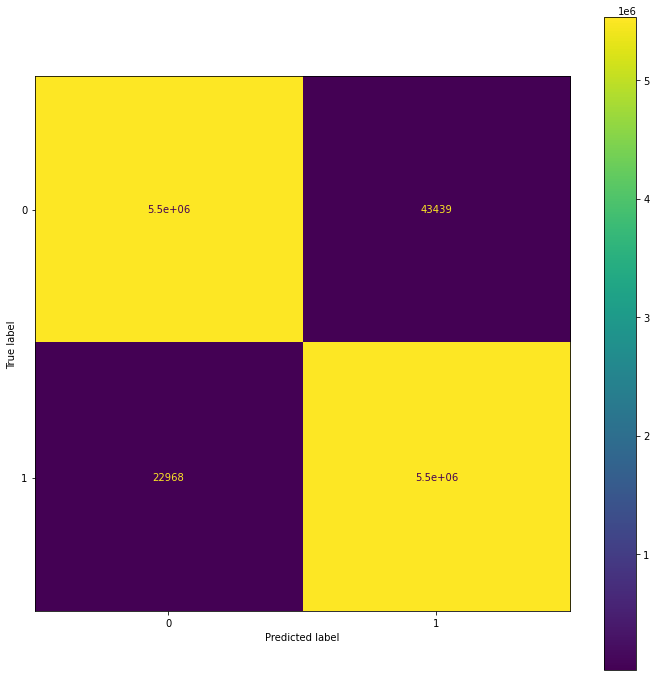

In [24]:
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

In [25]:
cm2 = confusion_matrix(y_test, y_test_pred)
cm2

array([[2359731,   18750],
       [   9938, 2369895]], dtype=int64)

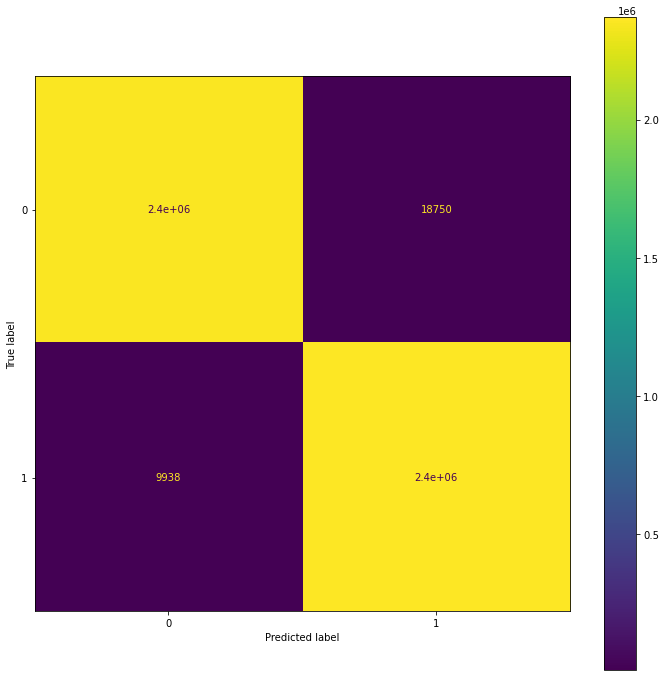

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=le.classes_).plot(ax=ax)
plt.show()

In [27]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train)
print(classification_report(y_train_labels, y_train_pred_labels))
performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
performance

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   5552041
           1       0.99      1.00      0.99   5550689

    accuracy                           0.99  11102730
   macro avg       0.99      0.99      0.99  11102730
weighted avg       0.99      0.99      0.99  11102730



,accuracy,precision,recall,f1_score
0,0.99402,0.99218,0.99585,0.99401
1,0.99402,0.99586,0.9922,0.99403


In [28]:
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_true_labels = le.inverse_transform(y_test)
print(classification_report(y_test_true_labels,y_test_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   2378481
           1       0.99      1.00      0.99   2379833

    accuracy                           0.99   4758314
   macro avg       0.99      0.99      0.99   4758314
weighted avg       0.99      0.99      0.99   4758314



In [67]:
y_test_pred_labels

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [68]:
y_test_true_labels

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [29]:
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance

,accuracy,precision,recall,f1_score
0,0.99397,0.99581,0.99212,0.99396
1,0.99397,0.99215,0.99582,0.99398


In [30]:
import time

start = time.time()
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance
end = time.time()
print(end - start)

1.1899337768554688


In [31]:
y_train_pred_prob.shape

(11102730, 2)

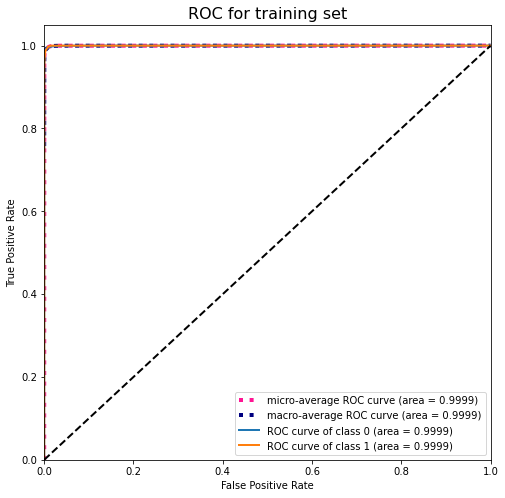

In [34]:
RoC_Curve(y_train_pred_prob, y_train, le.classes_, title='ROC for training set')

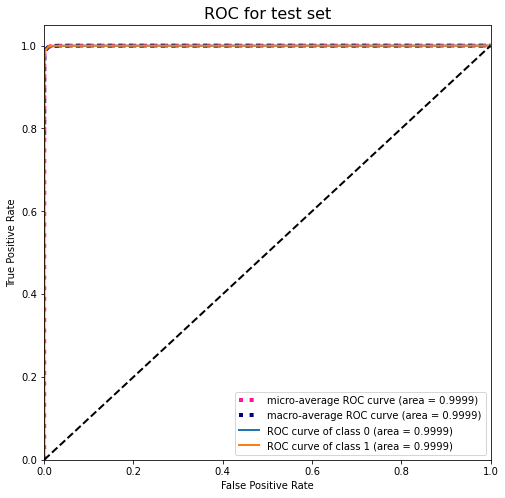

In [35]:
RoC_Curve(y_test_pred_prob, y_test, le.classes_, title='ROC for test set')

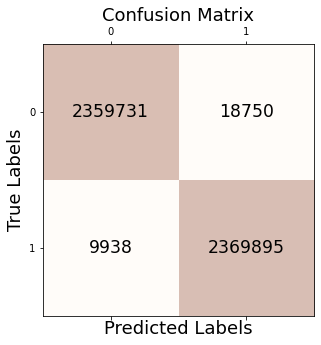

In [33]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Labels', fontsize=18)
plt.ylabel('True Labels', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [40]:
auc = roc_auc_score(y_test_true_labels, y_test_pred_labels)
print('AUC: %.5f' % auc)

AUC: 0.99397


In [50]:
auc = roc_auc_score(y_test_true_labels, y_test_pred_labels)
print('AUC: %.5f' % auc)

AUC: 0.99397


In [52]:
def show_score(y_true, y_pred_proba, name='', cm=False, roc=True):
  y_pred = y_pred_proba.round()
  print('_'*40 + name+' data' + '_'*40)
  # print('Accuracy: ', accuracy_score(y_true, y_pred), end='\n'*2)
  print('Classification Report:')
  print(classification_report(y_true, y_pred), end='\n')
  print('-'*80)
  print('ROC AUC Score:')
  print(roc_auc_score(y_true, y_pred_proba))
  print('-'*80)
  
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
  if cm:
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='.5f', xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'], ax=ax1);
    ax1.set_title('Confusion Matrix')

  if roc:
    fpr, tpr, th = roc_curve(y_true, y_pred_proba)  
    ax2.set_title('ROC Curve')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_xlabel('False Positive Rate')
    ax2.plot(fpr, tpr, linestyle='--');
  plt.show()
  print('-'*80)

________________________________________Test data________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   2378481
           1       0.99      1.00      0.99   2379833

    accuracy                           0.99   4758314
   macro avg       0.99      0.99      0.99   4758314
weighted avg       0.99      0.99      0.99   4758314

--------------------------------------------------------------------------------
ROC AUC Score:
0.9939704470727869
--------------------------------------------------------------------------------


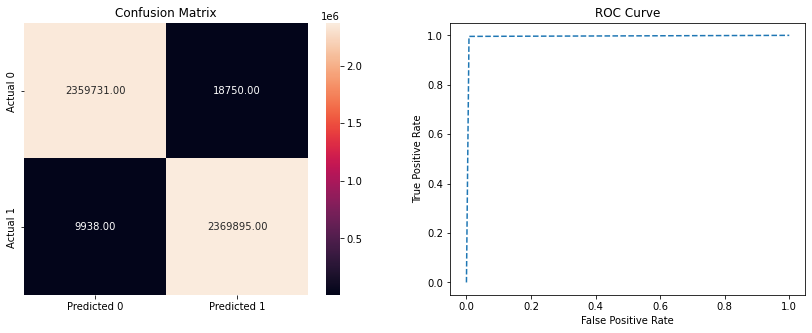

--------------------------------------------------------------------------------


In [55]:
show_score(y_test_true_labels, y_test_pred_labels, name='Test', cm=True)

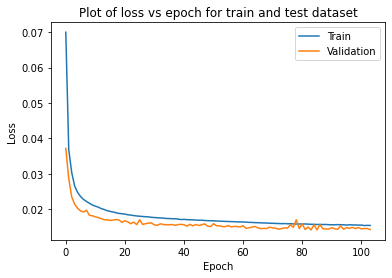

In [56]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.savefig('plots/ae_binary_loss.png')
plt.show()

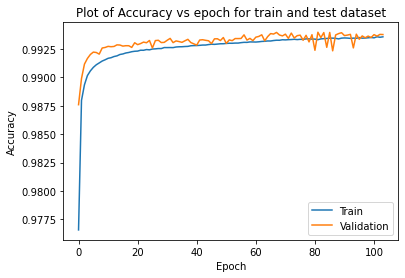

In [64]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#plt.savefig('plots/ae_binary_loss.png')
plt.show()